# Work balance analysis of the BigTech companies' employees in California 

### Group H: Eugenio Baldo, Stefania Sferragatta, Clara Lecce

The aim of our analysis is to focus on which factors have an influence on the work balance equilibra of an employee in six BigTech companies. 

In this analysis we will consider only the ratings variable, which are:
- work_balance_stars, 
- culture_values_stars,
- carrer_opportunities_stars, 
- comp_benefit_stars (salary and benefit), 
- senior_mangemenet_stars. 

These attributes represent a judgement made by a particular employee between 2008 and 2018 on his job situation in the company on a scale of 1-5.

We choose to focus only on the company located in California (USA) since in that place there are the headquarters of the companies taken into account.

With this restriction we aim to have less biased observations, with reference to different customs and habits of different regions around the world. Provided that these judgements are likely to be related each other, we would discover these patterns and, in particular, the ones related to the work balance. An hint of the relationships are provided by correlation. 


##### Please notice that we are going to draw the analysis on each **distinct company** in order to obtain meaningful results that can be **compared** to discover whether there are similarities or not among the causal relationships between the companies.

The tools choosen for our analysis are:
- Checking **correlations**;
- Checking **causality** using:
    - **Probabilistic graphical models**;
    - **Causal inference estimation methods**.

**Dataset**:

1. Company: Company name
3. Location : This dataset is global, as such it may include the country’s name in parenthesis [i.e “Toronto, ON(Canada)”]. However, if the location is in the USA then it will only include the city and state[i.e “Los Angeles, CA”]
3. Date Posted: in the following format MM DD, YYYY
4. Job-Title: This string will also include whether the reviewer is a ‘Current’ or ‘Former’ Employee at the time of the review
5. Summary: Short summary of employee review
6. Overall Rating: 1–5
7. Work/Life Balance Rating: 1–5
8. Culture and Values Rating: 1–5
9. Career Opportunities Rating: 1–5
10. Comp & Benefits Rating: 1–5
11. Senior Management Rating: 1–5
12. Helpful Review Count: A count of how many people found the review to be helpful

In [1]:
from script import *

(For the code please see the 'script.py' source file in which there are the libraries and also some usefull functions)

## Load the processed dataset
(For the code please see the 'data_preprocessing.py')

In [3]:
data = pd.read_csv('processed_employee_reviews.csv')
data = data.drop(['Unnamed: 0'], axis= 1)

In [4]:
data.head()

,company,location,job-title,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,year
0,google,"Mountain View, CA",Former Employee - Program Manager,4.0,2.0,3.0,3.0,5.0,3.0,2094,2013.0
1,google,"Mountain View, CA",Current Employee - Anonymous Employee,5.0,2.0,5.0,5.0,4.0,5.0,498,2015.0
2,google,"Los Angeles, CA",Former Employee - Software Engineer,5.0,5.0,5.0,5.0,5.0,5.0,49,2018.0
3,google,"Mountain View, CA",Former Employee - SDE2,5.0,4.0,4.0,4.0,5.0,4.0,1,2018.0
4,google,"Mountain View, CA",Current Employee - Anonymous Employee,5.0,4.0,5.0,4.0,4.0,3.0,0,2018.0


## Data analysis and visualization

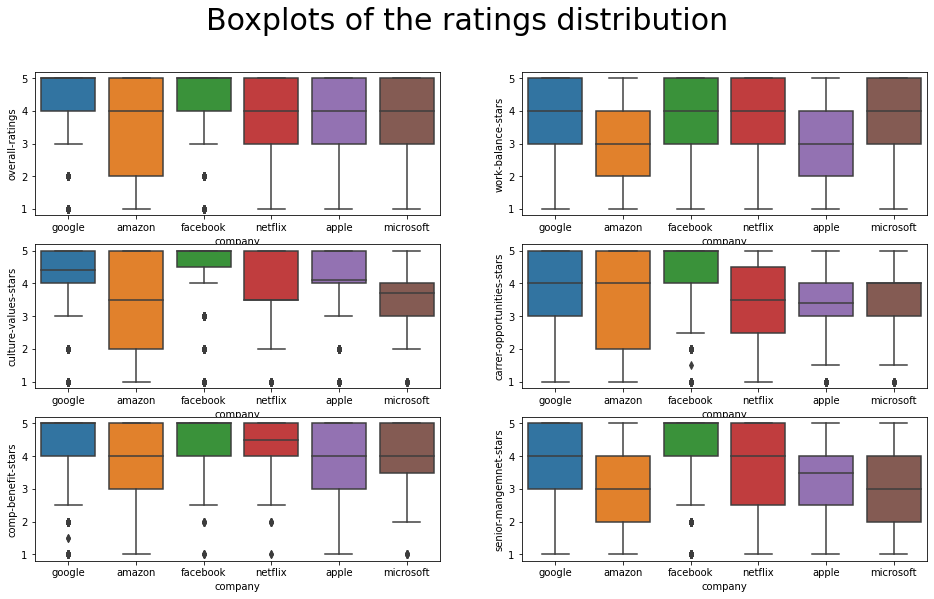

In [6]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(16,9))
fig.suptitle('Boxplots of the ratings distribution',fontsize=30)
bp(x='company',y='overall-ratings',data=data,ax=axes[0,0])
bp(x='company',y='work-balance-stars',data=data,ax=axes[0,1])
bp(x='company',y='culture-values-stars',data=data,ax=axes[1,0])
bp(x='company',y='carrer-opportunities-stars',data=data,ax=axes[1,1])
bp(x='company',y='comp-benefit-stars',data=data,ax=axes[2,0])
bp(x='company',y='senior-mangemnet-stars',data=data,ax=axes[2,1])
plt.show()

#### Distribution of Reviews by year

/home/eugibaldo/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


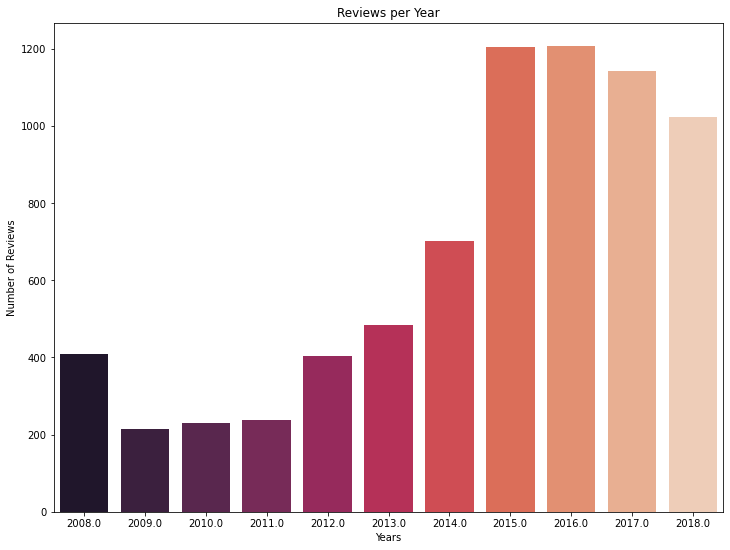

In [15]:
years_count = data_CA['year'].value_counts().sort_index(ascending=True)
years_labels = years_count.index.tolist()
years_index = np.arange(len(years_labels))

plt.figure(figsize=(12, 9))
_ = sns.barplot(years_index, years_count, palette='rocket')
_ = plt.xticks(years_index, years_labels)
_ = plt.xlabel("Years")
_ = plt.ylabel("Number of Reviews")
_ = plt.title("Reviews per Year")

### Which company takes the best treatment for the employees? 

In [9]:
def rating_per_company(rating_type, title, color):
    work_ratings = data[['company', rating_type]]
    work_ratings = work_ratings[~(work_ratings[[rating_type]] == "none").any(axis=1)]
    work_ratings[rating_type] = work_ratings[rating_type].apply(pd.to_numeric)
    group = work_ratings.groupby(work_ratings["company"].str.title())[rating_type].mean().reset_index()
    group.sort_values([rating_type],inplace=True)
    group.set_index('company').plot.barh(legend=False, figsize=(8, 8), color=color)
    plt.title('{} Rating'.format(title))
    plt.xlabel('Rating')
    _ = plt.ylabel('Companies')

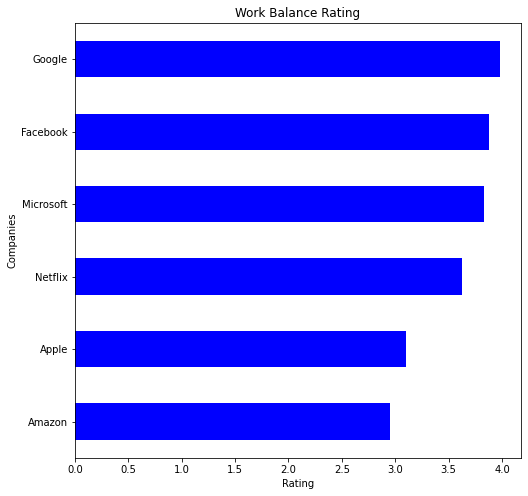

In [10]:
# Which company offers better Work-Life Balance?
rating_per_company('work-balance-stars', "Work Balance", "b")

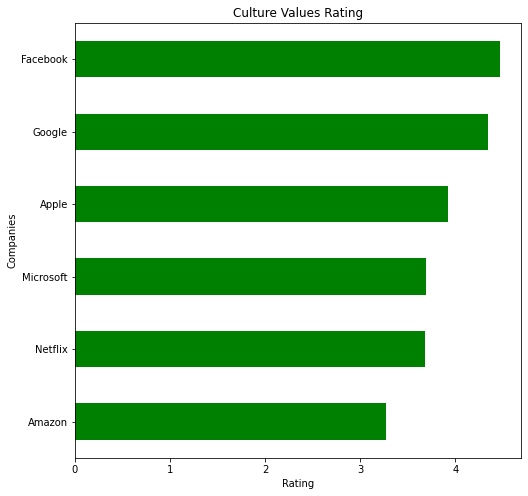

In [11]:
#Which company has better Culture Values?
rating_per_company('culture-values-stars', "Culture Values", "g")

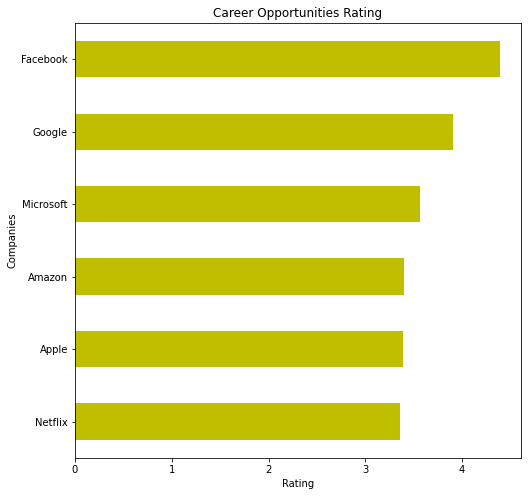

In [12]:
#Which company has better Career Opportunities?
rating_per_company("carrer-opportunities-stars", "Career Opportunities", "y")

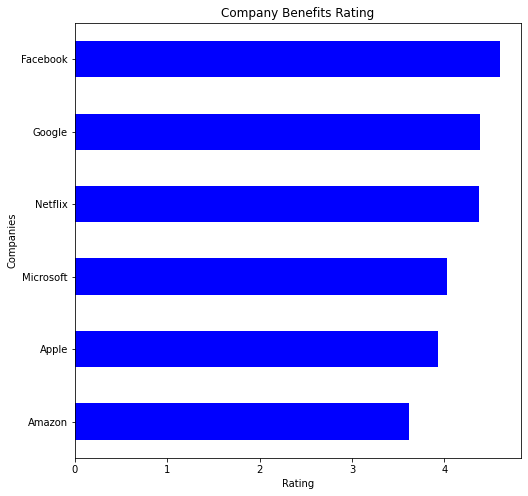

In [13]:
rating_per_company("comp-benefit-stars", "Company Benefits", "b")

## Normalizing the dataframe to explore the correlation between the features
(For the code please see the 'data_normalization.py' script)

In [8]:
data_new = pd.read_csv('normalized_data.csv')
data_new = data_new.drop(['Unnamed: 0'], axis= 1)

In [9]:
data_new.head()

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,Company_code,Job_code,Locations_code
0,0.75,0.25,0.50,0.50,1.00,0.50,1.000000,0.6,0.830282,0.517949
1,1.00,0.25,1.00,1.00,0.75,1.00,0.237822,0.6,0.020287,0.517949
2,1.00,1.00,1.00,1.00,1.00,1.00,0.023400,0.6,0.922316,0.410256
3,1.00,0.75,0.75,0.75,1.00,0.75,0.000478,0.6,0.851559,0.517949
4,1.00,0.75,1.00,0.75,0.75,0.50,0.000000,0.6,0.020287,0.517949


#### Now that we have only encoded data and the values are normalize, we can explore the correlation between the variables 

In [10]:
corr_matrix = data_new.corr()
corr_matrix

,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,Company_code,Job_code,Locations_code
overall-ratings,1.000000,0.603002,0.719810,0.717758,0.573054,0.730413,-0.057725,0.153446,-0.149378,0.015109
work-balance-stars,0.603002,1.000000,0.538494,0.487128,0.427564,0.579817,-0.059352,0.277916,-0.091613,0.089179
culture-values-stars,0.719810,0.538494,1.000000,0.586625,0.473530,0.679739,-0.051175,0.155848,-0.116036,-0.004365
carrer-opportunities-stars,0.717758,0.487128,0.586625,1.000000,0.554727,0.660001,-0.047716,0.107741,-0.117631,0.041321
comp-benefit-stars,0.573054,0.427564,0.473530,0.554727,1.000000,0.500802,-0.005771,0.226806,-0.046077,0.015356
senior-mangemnet-stars,0.730413,0.579817,0.679739,0.660001,0.500802,1.000000,-0.040167,0.142332,-0.134912,-0.025435
helpful-count,-0.057725,-0.059352,-0.051175,-0.047716,-0.005771,-0.040167,1.000000,0.034723,0.025016,-0.024591
Company_code,0.153446,0.277916,0.155848,0.107741,0.226806,0.142332,0.034723,1.000000,0.026377,0.054355
Job_code,-0.149378,-0.091613,-0.116036,-0.117631,-0.046077,-0.134912,0.025016,0.026377,1.000000,0.006841
Locations_code,0.015109,0.089179,-0.004365,0.041321,0.015356,-0.025435,-0.024591,0.054355,0.006841,1.000000


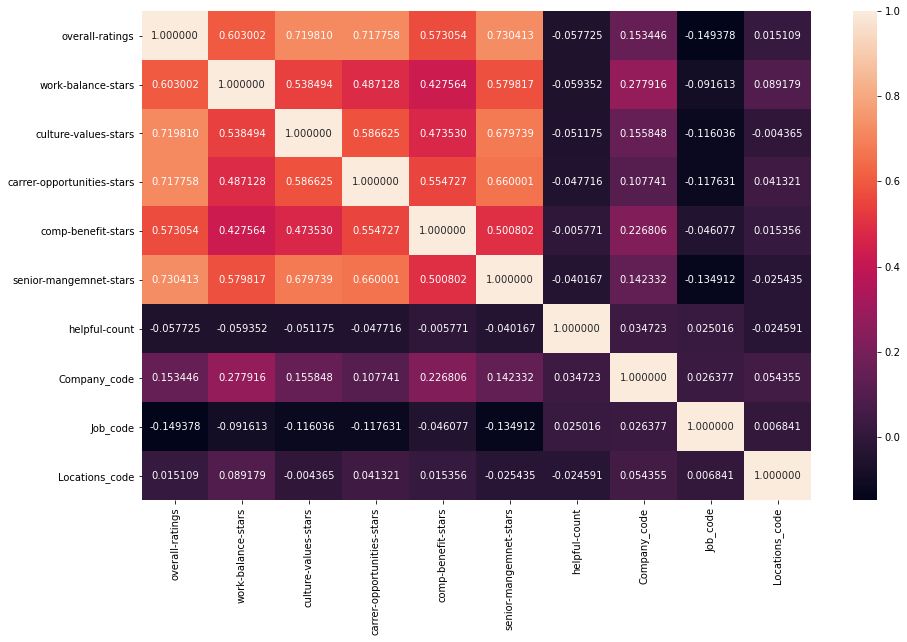

In [26]:
plt.figure(figsize=(15, 9))
sns.heatmap(corr_matrix, annot=True, fmt="f");

### From now on we are going to analyze each Company separately, hence we created as many notebooks as the companies.

**Facebook**

For this first **draft** we provide the analysis only for the Facebook company. To see it please check the 'facebook.ipynb' notebook. 
##### Looking forward for your feedback about it to **extend our analysis** also on all the other companies. 

In [51]:
# facebook=data[data['company']=='facebook']
# facebook.to_csv('facebook.csv')

**Google**

In [28]:
# google=data[data['company']=='google']
# google.to_csv('google.csv')

**amazon**

In [35]:
# amazon=data[data['company']=='amazon']
# amazon.to_csv('amazon.csv')

**apple**

In [39]:
# apple=data[data['company']=='apple']
# apple.to_csv('apple.csv')

**microsoft**

In [43]:
# microsoft=data[data['company']=='microsoft']
# microsoft.to_csv('microsoft.csv')

**netflix**

In [47]:
# netflix=data[data['company']=='netflix']
# netflix.to_csv('netflix.csv')